<a href="https://colab.research.google.com/github/muhammadhafiz27/DIF62130_A_25_2311532007_MuhammadHafiz/blob/main/Praktikum3/BernoulliNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/muhammadhafiz27/DIF62130_A_25_2311532007_MuhammadHafiz/refs/heads/main/Dataset/Cleaned-Data.csv'
df = pd.read_csv(dataset_url)

#display dataset
print(df.head())


   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0      1          1          1                        1            1   
1      1          1          1                        1            1   
2      1          1          1                        1            1   
3      1          1          1                        1            1   
4      1          1          1                        1            1   

   None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0             0      1                 1           1         1  ...   
1             0      1                 1           1         1  ...   
2             0      1                 1           1         1  ...   
3             0      1                 1           1         1  ...   
4             0      1                 1           1         1  ...   

   Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0            1                   0              1                  0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [24]:
#drop column country
df = df.drop('Country', axis=1)

print(df.head())


   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0      1          1          1                        1            1   
1      1          1          1                        1            1   
2      1          1          1                        1            1   
3      1          1          1                        1            1   
4      1          1          1                        1            1   

   None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0             0      1                 1           1         1  ...   
1             0      1                 1           1         1  ...   
2             0      1                 1           1         1  ...   
3             0      1                 1           1         1  ...   
4             0      1                 1           1         1  ...   

   Gender_Female  Gender_Male  Gender_Transgender  Severity_Mild  \
0              0            1                   0              1   
1   

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Class' is the target variable column and other columns are features
X = df.drop('Severity_Severe', axis=1)
y = df['Severity_Severe']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #adjust test_size as needed

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47641
           1       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360

[[47641     0]
 [    0 15719]]


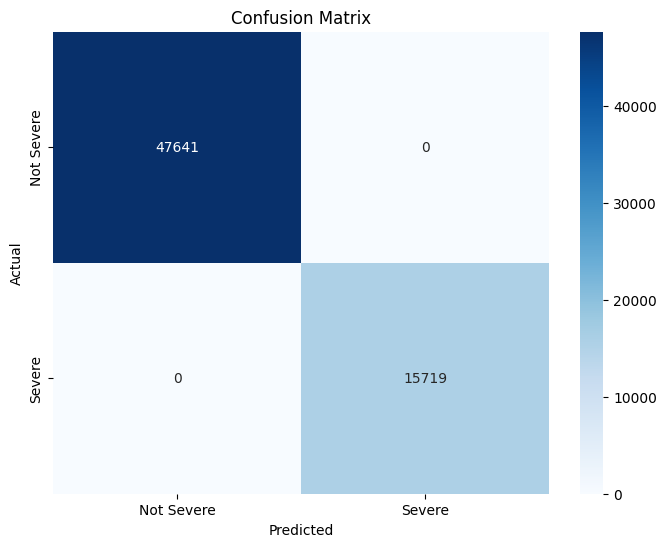

In [26]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Severe', 'Severe'],
            yticklabels=['Not Severe', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
